* DAMI Assignment *

# Who Survived the Titanic Disaster?

## 1. Introduction

In this Titanic example, we will use decision trees. The main advantage of this model is that humans can easily understand and reproduce the sequence of decisions taken to predict the target class of a new data point.

This is very important for tasks such as medical diagnosis or credit approval, where we want to show a reason for the decision rather than just saying this is what the training data suggests (which is, by definition, what every supervised learning method does).

The problem we would like to solve is determining whether a Titanic passenger would have survived, given their age, class, and sex.

Why age, class and sex features?

Answer: Particular features (the name is an extreme case) could result in overfitting (consider a tree that asks if the name is X; she survived). Features for which a small number of instances with each value present a similar problem. They might not be helpful for generalisation. We will use class, age, and sex because we expect them to have possibly influenced the passenger's survival.

For this assignment, you need this Jupyter notebook and this dataset Download dataset. Have fun with data mining and building trees!

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Prepare Dataset with Pandas 

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [31]:
import pandas as pd
import numpy as np

# print('numpy version:', np.__version__)
# print('matplotlib version:', pd.__version__)

## Your code ...

# read with pandas into a dataframe


# show the first 5 rows

df = pd.read_csv('passengers-titanic.csv')
print(df.head())


   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  

Also show the 10 last rows. What is the problem in the last couple of rows?


In [32]:
## Your code ...

# show 10 last rows

# problem: ?
print(df.tail(10))
# Problem: Null values that we dont want


      row.names pclass  survived                    name  age embarked  \
1303       1304    3rd         0      Yasbeck, Mr Antoni  NaN      NaN   
1304       1305    3rd         1     Yasbeck, Mrs Antoni  NaN      NaN   
1305       1306    3rd         0      Youssef, Mr Gerios  NaN      NaN   
1306       1307    3rd         0     Zabour, Miss Hileni  NaN      NaN   
1307       1308    3rd         0     Zabour, Miss Tamini  NaN      NaN   
1308       1309    3rd         0      Zakarian, Mr Artun  NaN      NaN   
1309       1310    3rd         0  Zakarian, Mr Maprieder  NaN      NaN   
1310       1311    3rd         0         Zenn, Mr Philip  NaN      NaN   
1311       1312    3rd         0           Zievens, Rene  NaN      NaN   
1312       1313    3rd         0          Zimmerman, Leo  NaN      NaN   

     home.dest room ticket boat     sex  
1303       NaN  NaN    NaN  NaN    male  
1304       NaN  NaN    NaN  NaN  female  
1305       NaN  NaN    NaN  NaN    male  
1306       NaN  N

### 2.2. Investigate Dataset

How does Pandas interpret the data? The following 3 commands can be used to investigate the data. Describe in your own words what the command does.

In [33]:
df.dtypes

## Your answer ...
## gives  a summary of the data types of each column in the dataset

row.names      int64
pclass        object
survived       int64
name          object
age          float64
embarked      object
home.dest     object
room          object
ticket        object
boat          object
sex           object
dtype: object

In [34]:
df.info()

## Your answer ...
## Overall Summary of the Data, including information about the index,type and columns, non-null values, and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [35]:
df.describe()

## Your answer ...
## provides descriptive statistics of numerical columns in the dataset 


,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


In [36]:
# Slice and print the first 10 rows of the 'age' column. 

## Your code ...

print(df['age'].head(10))



0    29.0000
1     2.0000
2    30.0000
3    25.0000
4     0.9167
5    47.0000
6    63.0000
7    39.0000
8    58.0000
9    71.0000
Name: age, dtype: float64


In [37]:
# What kind of object is this 'age' column?   


# Note: Single column is neither an numpy array, nor a pandas dataframe but rather a pandas-specific object called data Series.
# It is a float64 type

In [38]:
# What is the average age over all passengers? about 31 years old

## Your code ...
average_age = df['age'].mean()
print("Average age over all passengers:", average_age)

Average age over all passengers: 31.19418104265403


In [39]:
# The next thing we'd like to do is look at more specific subsets of the dataframe. Slice the columns 'sex', 'pclass', 
# and 'age'.

## Your code ...

subset = df[['sex', 'pclass', 'age']]
print(subset)

         sex pclass      age
0     female    1st  29.0000
1     female    1st   2.0000
2       male    1st  30.0000
3     female    1st  25.0000
4       male    1st   0.9167
...      ...    ...      ...
1308    male    3rd      NaN
1309    male    3rd      NaN
1310    male    3rd      NaN
1311  female    3rd      NaN
1312    male    3rd      NaN

[1313 rows x 3 columns]


In [40]:
# First look at all of the missing 'age' values, because we will need to address them in our model if we hope to use 
# all the data for more advanced algorithms. To filter for missing values you can use:
df[df['age'].isnull()][['sex', 'pclass', 'age']]

,sex,pclass,age
12,female,1st,NaN
13,male,1st,NaN
14,male,1st,NaN
29,male,1st,NaN
32,male,1st,NaN
...,...,...,...
1308,male,3rd,NaN
1309,male,3rd,NaN
1310,male,3rd,NaN
1311,female,3rd,NaN


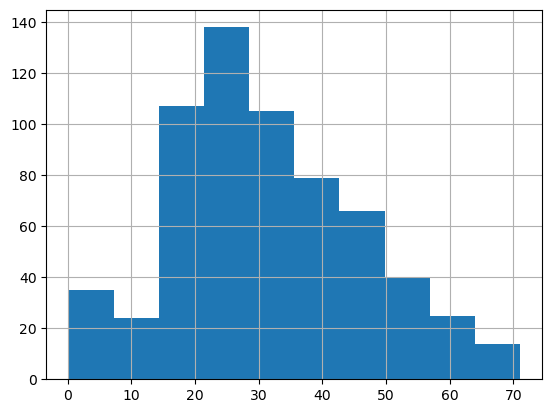

In [41]:
# Before we finish the initial investigation, let's use one other convenience function of pandas to derive a 
# histogram of any numerical column. 
import pylab as pyl
df['age'].hist()
pyl.show()

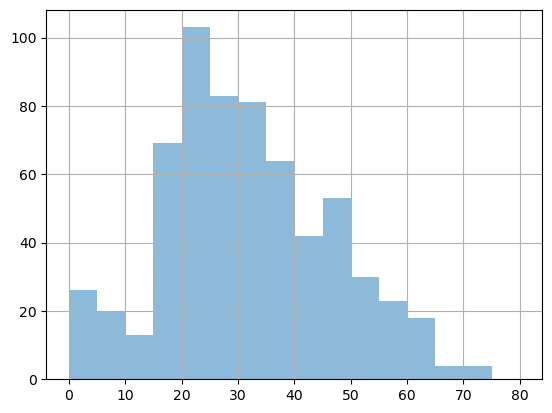

In [42]:
# Inside the parentheses of .hist(), you can also be more explicit about options of this function. Before you invoke 
# it, you can also be explicit that you are dropping the missing values of age:
df['age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
pyl.show()

## 3. Data Munging

### 3.1. Transform the Data 

Transform the values in the dataframe into the shape we need for machine learning. 

First of all, it's hard to run analysis on the string values of "male" and "female". 
Let's store this transformation into a new column 'Sex'. We have a precedent of analyzing the women first, so let's decide female = 0 and male = 1.  

In [49]:
# Let's store our transformation in a new column, so the original sex isn't changed. Show the first 3 instances.

## Your code ...
df['Sex'] = df['sex'].map({'female': 0, 'male': 1})
print(df)


      row.names pclass  survived  \
0             1    1st         1   
1             2    1st         0   
2             3    1st         0   
3             4    1st         0   
4             5    1st         1   
...         ...    ...       ...   
1308       1309    3rd         0   
1309       1310    3rd         0   
1310       1311    3rd         0   
1311       1312    3rd         0   
1312       1313    3rd         0   

                                                 name      age     embarked  \
0                        Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                         Allison, Miss Helen Loraine   2.0000  Southampton   
2                 Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3     Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                       Allison, Master Hudson Trevor   0.9167  Southampton   
...                                               ...      ...          ...   
1308          

In [44]:
# Do the same for passenger class, make it numeric, in a new column PClass. Show the first 3 instances.

## Your code ...

df['PClass'] = df['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
print(df[['pclass', 'PClass']].head(3))


  pclass  PClass
0    1st       1
1    1st       1
2    1st       1


In [45]:
# Show all males in the second class

## Your code ...
males_second_class = df[(df['sex'] == 'male') & (df['pclass'] == '2nd')]
print(males_second_class)


     row.names pclass  survived                           name   age  \
322        323    2nd         0             Abelson, Mr Samuel  30.0   
324        325    2nd         0        Andrew, Mr Edgar Samuel  18.0   
325        326    2nd         0               Andrew, Mr Frank   NaN   
326        327    2nd         0           Angle, Mr William A.  34.0   
328        329    2nd         0                 Ashby, Mr John  57.0   
..         ...    ...       ...                            ...   ...   
593        594    2nd         1           Wilhelms, Mr Charles  32.0   
595        596    2nd         1    Williams, Mr Charles Eugene   NaN   
598        599    2nd         0  Aldworth, Mr Charles Augustus  30.0   
600        601    2nd         0                Pernot, Mr Rene   NaN   
601        602    2nd         0               Swane, Mr George  18.0   

        embarked                                 home.dest  room      ticket  \
322    Cherbourg                       Russia New York,

### 3.2. Deal with Missing Values

Now it's time to deal with the missing values of age! Why? Simply because most machine learning will need a complete set of 
values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can 
keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall 
predictive power of age might still make a better model than before. 

We know the average age of all passengers (with valid age field) is 31.2 - we could fill in the null values with that mean value. But may be the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The age histogram did seem positively skewed. These are the kind of decisions you make as you create your models.

In [46]:
# Replace the NaN (unknown) age values with a reasonable estimate. Do this in a new column 'AgeFill'
## Your code ...

median_age = df['age'].median()
df['AgeFill'] = df['age'].fillna(median_age)
print(df[['age', 'AgeFill']].head(15))


        age  AgeFill
0   29.0000  29.0000
1    2.0000   2.0000
2   30.0000  30.0000
3   25.0000  25.0000
4    0.9167   0.9167
5   47.0000  47.0000
6   63.0000  63.0000
7   39.0000  39.0000
8   58.0000  58.0000
9   71.0000  71.0000
10  47.0000  47.0000
11  19.0000  19.0000
12      NaN  30.0000
13      NaN  30.0000
14      NaN  30.0000


### 3.3 Hot Encoding

We have a categorical feature attribute: pclass. We already converted its three classes into 1, 2, and 3. This transformation implicitly introduces an ordering. 

As a final step, we will try a more general approach that does not assume an ordering. This is widely used to convert categorical classes into real-valued attributes. We will introduce an additional encoder and convert the class attributes into three new binary features, each of them indicating if the instance belongs to a feature value (1) or (0). This is called one hot encoding, and it is a very common way of managing categorical attributes for real-based methods.

In [61]:
df['FirstClass'] = df['pclass'].map( {'1st': 1, '2nd': 0, '3rd': 0} ).astype(int)
df['SecondClass'] = df['pclass'].map( {'1st': 0, '2nd': 1, '3rd': 0} ).astype(int)
df['ThirdClass'] = df['pclass'].map( {'1st': 0, '2nd': 0, '3rd': 1} ).astype(int)

df.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Sex,PClass,AgeFill,FirstClass,SecondClass,ThirdClass
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1,29.0000,1,0,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,2.0000,1,0,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1,1,30.0000,1,0,0
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,25.0000,1,0,0
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,1,0.9167,1,0,0


## 4. Finalize Dataset for Analysis

In [67]:
# Finalize pre-processing by turning this into a numerical feature set (dataframe titanic_X) and a numerical target column 
# (dataframe titanic_y)

## Your code ...
titanic_X = df.drop(columns=['survived','age','row.names','boat','name','embarked','home.dest', 'pclass', 'sex', 'ticket','room'])
# titanic_X = df['PClass','Sex','AgeFill','FirstClass','SecondClass', 'ThirdClass']

titanic_y = df[['survived']]
# print("Feature set (titanic_X):")
print(titanic_X.head(10))

# print("\nTarget column (titanic_y):")
# print(titanic_y.head())


   Sex  PClass  AgeFill  FirstClass  SecondClass  ThirdClass
0    0       1  29.0000           1            0           0
1    0       1   2.0000           1            0           0
2    1       1  30.0000           1            0           0
3    0       1  25.0000           1            0           0
4    1       1   0.9167           1            0           0
5    1       1  47.0000           1            0           0
6    0       1  63.0000           1            0           0
7    1       1  39.0000           1            0           0
8    0       1  58.0000           1            0           0
9    1       1  71.0000           1            0           0


In [ ]:
titanic_X.head(10)

,survived,Sex,PClass,AgeFill,FirstClass,SecondClass,ThirdClass
0,1,0,1,29.0000,1,0,0
1,0,0,1,2.0000,1,0,0
2,0,1,1,30.0000,1,0,0
3,0,0,1,25.0000,1,0,0
4,1,1,1,0.9167,1,0,0
5,1,1,1,47.0000,1,0,0
6,1,0,1,63.0000,1,0,0
7,0,1,1,39.0000,1,0,0
8,1,0,1,58.0000,1,0,0
9,0,1,1,71.0000,1,0,0


In [ ]:
titanic_y.head(10)

,survived
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,1
9,0


## 5. Analyse Dataset

The preprocessing step is usually under-estimated in machine learning methods, but as we can see even in this very simple example, it can take some time to make data look as our methods expect. It is also very important in the overall machine learning process; if we fail in this step (for example, incorrectly encoding attributes, or selecting the wrong features), the following steps will fail, no matter how good the method we use for learning!!

We are now ready for the implementation of decision trees in scikit-learn, as this algo expects as input a list of 
real-valued features, and the decision rules of the model would be of the form: Feature < value. 
For example, AgeFill < 20.0.

Standardization (normalization) is not an issue for decision trees because the relative magnitude of features does not 
affect the classifier performance; so scaling is not needed.

### 5.1. Training a Decision Tree Classifier

In [68]:
# Now to the interesting part; let's build a decision tree from our training data. 
# As usual, first separate training and testing data, and check the size of both sets.
from sklearn.model_selection import train_test_split

## Your code ...
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.3, random_state=1)
print("Training set size (X_train):", X_train.size)
print("Testing set size (X_test):", X_test.size)


Training set size (X_train): 5514
Testing set size (X_test): 2364


In [ ]:
# Now, we can create a new DecisionTreeClassifier and use the fit method of the classifier to do the learning job. 
# Parameter settings: use the entropy citerion and try out different settings for the depth of the tree and the 
# minimum samples required for a node in the tree graph

# from sklearn.tree import DecisionTreeClassifier

# # Define different settings for max depth and min samples split
# max_depths = 50  # None means unlimited depth
# min_samples_splits = 5


# clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depths, min_samples_split=min_samples_splits, random_state=42)
# clf.fit(X_train, y_train)
# # Evaluate the classifier
# train_score = clf.score(X_train, y_train)
# test_score = clf.score(X_test, y_test)

# print(f"Max Depth: {max_depths}, Min Samples Split: {min_samples_splits}")
# print(f"Training Accuracy: {train_score:.4f}, Testing Accuracy: {test_score:.4f}")
# print("="*50)
# import tree



### 5.2. Evaluation Metrics Function

In [69]:
# Define a generic helper function to measure the performance of the classifier, and call this function to show 
# the results (e.g. accuracy)
# import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


## Your code ...


dtc = DecisionTreeClassifier(random_state = 42, criterion='entropy', max_depth = 2)
clf = dtc.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#----------------


def performance(pred: np.ndarray, test: pd.core.series.Series):
    print("Accuracy" + str(metrics.accuracy_score(test, pred)))

performance(y_pred, y_test)

Accuracy0.8527918781725888


## 6. Introducing Random Forest

A common criticism to decision trees is that once the training set is divided after
answering a question, it is not possible to *reconsider this decision*. For example, if
we divide men and women, every subsequent question would be only about men or
women, and the method could not consider another type of question (say, age less
than a year, irrespective of the gender). Random Forests try to introduce some level
of randomization in each step, proposing alternative trees and combining them to
get the final prediction. These types of algorithms that consider several classifiers
answering the same question are called **ensemble methods**. In the Titanic task, it is
probably hard to see this problem because we have very few features, but usually
a case has in the order of thousand(s) features.

Random Forests propose to build several decision trees, each one based on a subset of the training
instances (selected randomly), and using a small random number of features. 
This produces multiple classifiers (multiple decision trees). 
At prediction time, each grown tree, given an instance, predicts its target class exactly as decision trees do. 
The class that most of the trees vote (that is the class most predicted by the trees) is the one suggested by the ensemble classifier.

## 7. Implement Random Forest

Implement a Random Forest classifier. Can you improve to above accuracy? Look at the sklearn documentation. Play with the parameters of the ``RandomForestClassifier``. Especially the parameter ``n_estimators`` (the number of trees in the forest) is of interest.

In [70]:
# Implement a Random Forest classifier, does this improve the prediction?

## Your code ...

# from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
performance(y_pred_rf, y_test)


Accuracy0.8350253807106599


c:\Users\Leonardo\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
